In [ ]:
# Loading libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Loading dataset:
df_cust = pd.read_csv('Crisis Management/data/dim_customer.csv')
df_part = pd.read_csv('Crisis Management/data/dim_delivery_partner.csv')
df_menu = pd.read_csv('Crisis Management/data/dim_menu_item.csv')
df_rest = pd.read_csv('Crisis Management/data/dim_restaurant.csv')
df_perf = pd.read_csv('Crisis Management/data/fact_delivery_performance.csv')
df_item = pd.read_csv('Crisis Management/data/fact_order_items.csv')
df_order = pd.read_csv('Crisis Management/data/fact_orders.csv')
df_rate = pd.read_csv('Crisis Management/data/fact_ratings.csv')

In [2]:
df_order.shape

(149166, 11)

In [3]:
df_menu.shape

(342671, 6)

In [4]:
df_rest.shape

(19995, 7)

In [5]:
df_cust.head()

,customer_id,signup_date,city,acquisition_channel
0,CUST000007,21-03-2025,Pune,Organic
1,CUST000008,07-02-2025,Kolkata,Referral
2,CUST000009,25-02-2025,Delhi,Paid
3,CUST000010,28-01-2025,Hyderabad,Paid
4,CUST000011,18-01-2025,Kolkata,Organic


In [6]:
df_part.head()

,delivery_partner_id,partner_name,city,vehicle_type,employment_type,avg_rating,is_active
0,DP09615,Neha E,Bengaluru,Scooter,Full-time,3.77,Y
1,DP02021,Neha V,Bengaluru,Bike,Full-time,3.90,Y
2,DP05541,Vikas S,Delhi,Cycle,Part-time,3.33,Y
3,DP13859,Amit B,Delhi,Cycle,Part-time,4.07,N
4,DP08091,Arjun R,Mumbai,Car,Full-time,4.63,Y


In [7]:
df_menu.head()

,menu_item_id,restaurant_id,item_name,category,is_veg,price
0,MENU12962_3216,REST12962,Paneer Tikka Pizza,Pizza,Y,271.05
1,MENU12962_1962,REST12962,Pepperoni Pizza,Pizza,N,327.26
2,MENU14069_0510,REST14069,Egg Fried Rice,Fried Rice,N,200.01
3,MENU14069_4308,REST14069,Paneer Tikka,Starters,Y,198.83
4,MENU08622_7574,REST08622,Kadai Paneer,Curries,Y,271.60


In [8]:
df_rest.head()

,restaurant_id,restaurant_name,city,cuisine_type,partner_type,avg_prep_time_min,is_active
0,REST12962,Flavours of Sweets Palace,Bengaluru,Chinese,Restaurant,26-40,N
1,REST14069,Royal Biryani Darbar,Ahmedabad,Fast Food,Restaurant,16-25,Y
2,REST08622,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
3,REST19745,Delhi Express Palace,Ahmedabad,Pizza,Cloud Kitchen,16-25,Y
4,REST02383,Namma Mess Delight,Mumbai,Healthy,Restaurant,26-40,Y


In [9]:
df_perf.head()

,order_id,actual_delivery_time_mins,expected_delivery_time_mins,distance_km
0,ORD202501023439,31,31,6.4
1,ORD202501012051,46,42,1.9
2,ORD202501019281,25,31,6.2
3,ORD202501000124,29,41,6.2
4,ORD202501006518,37,41,2.4


In [10]:
df_item.head()

,order_id,item_id,menu_item_id,restaurant_id,quantity,unit_price,item_discount,line_total
0,ORD202501006518,ITEM001,MENU12962_3216,REST12962,2,48.31,0.00,96.62
1,ORD202501006518,ITEM002,MENU12962_1962,REST12962,3,61.24,0.00,183.71
2,ORD202501019281,ITEM001,MENU14069_0510,REST14069,2,87.19,0.00,174.38
3,ORD202501019281,ITEM002,MENU14069_4308,REST14069,3,84.67,0.00,254.00
4,ORD202501023439,ITEM001,MENU08622_7574,REST08622,2,235.81,35.44,436.18


In [11]:
df_order.head()

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N


In [12]:
df_rate.head()

,order_id,customer_id,restaurant_id,rating,review_text,review_timestamp,sentiment_score
0,ORD202501023439,CUST181110,REST08622,4.5,Super fast delivery,01-01-2025 15:00,0.75
1,ORD202501019281,CUST179306,REST14069,4.5,Great taste!,01-01-2025 15:00,0.75
2,ORD202501018036,CUST093042,REST13907,5.0,Super fast delivery,01-01-2025 14:03,1.00
3,ORD202501007724,CUST110825,REST08451,4.0,Tasty but a bit late,01-01-2025 14:06,0.50
4,ORD202501002349,CUST181669,REST00225,4.4,Satisfied overall,01-01-2025 14:06,0.70


## Primary Analysis

## Q1

1. Monthly Orders: Compare total orders across pre-crisis (Jan–May 2025) vs crisis (Jun–Sep 2025). How severe is the decline?

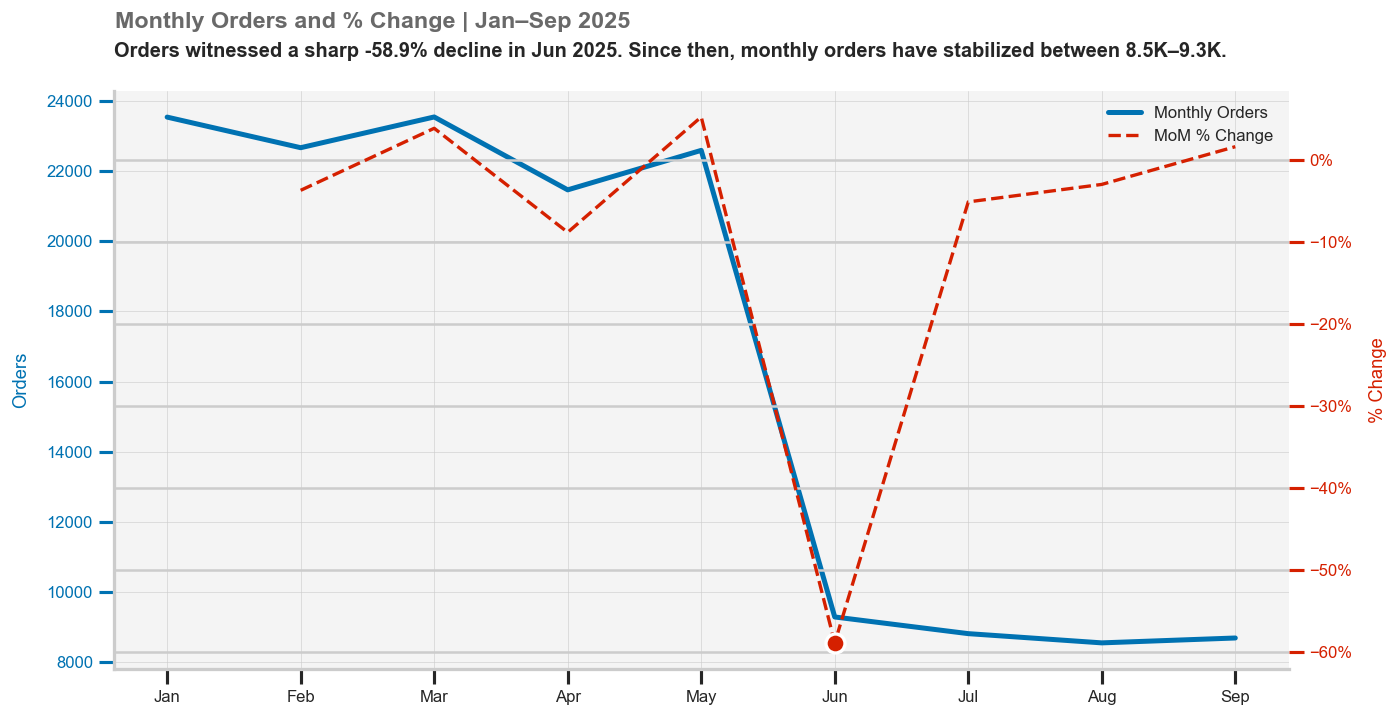

In [13]:
# Tranforming order time stamp column from object to timestamp
df_order['order_timestamp'] = pd.to_datetime(df_order['order_timestamp'])

# Adding month and month name
df_order['month'] = df_order['order_timestamp'].dt.month
df_order['month_name'] = df_order['order_timestamp'].dt.month_name().str[0:3]

# Computing Order count
order_count = (
    df_order
    .groupby(by= ['month','month_name'])['order_id']
    .agg(func= 'size')
    .sort_index()
    .rename('orders')
    .reset_index()
    .drop(columns= ['month'])
)
order_count['pct_change'] = order_count['orders'].pct_change(periods=1).mul(100).round(2)

pct_decline = order_count['pct_change'].min()
decline_month = order_count[order_count['pct_change'] == pct_decline]['month_name'].iloc[0]

# Economist-style palette
economist_blue = "#0072B2"
economist_red = "#D52000"
economist_grey = "#CCCCCC"
economist_bg = "#F4F4F4"

# Style setup
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_context("talk")

# Create figure
fig, ax1 = plt.subplots(figsize=(12, 6.5), dpi=120)
fig.patch.set_facecolor('white')
ax1.set_facecolor(economist_bg)

# --- Line 1: Monthly Orders ---
ax1.plot(
    order_count['month_name'],
    order_count['orders'],
    color=economist_blue,
    linewidth=3,
    label='Monthly Orders'
)
ax1.set_ylabel("Orders", fontsize=11, color=economist_blue, labelpad=10)
ax1.tick_params(axis='y', colors=economist_blue, labelsize=10)
ax1.tick_params(axis='x', labelsize=10)

# --- Line 2: % Change (secondary axis) ---
ax2 = ax1.twinx()
ax2.plot(
    order_count['month_name'],
    order_count['pct_change'],
    color=economist_red,
    linewidth=2,
    linestyle="--",
    label='MoM % Change'
)
ax2.set_ylabel("% Change", fontsize=11, color=economist_red, labelpad=10)
ax2.tick_params(axis='y', colors=economist_red, labelsize=10)
ax2.tick_params(axis='x', labelsize=10)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

# --- Highlight largest decline ---
ax2.scatter(
    x=decline_month, 
    y=pct_decline, 
    color=economist_red, 
    s=130, 
    edgecolors='white', 
    linewidth=2,
    zorder=5
)

# --- Titles & Caption ---
ax1.set_title(
    f"""Orders witnessed a sharp {pct_decline:.1f}% decline in {decline_month} 2025. Since then, monthly orders have stabilized between 8.5K–9.3K.""",
    fontsize=12, fontweight='bold', 
    loc='left',
    pad=20
)

plt.suptitle("Monthly Orders and % Change | Jan–Sep 2025", 
             fontsize=14, fontweight='bold', color='dimgray', x=0.273, y=0.93)

# --- Legend ---
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='best', frameon=False, fontsize=10)

# --- Grid, Borders & Layout ---
ax1.grid(True, color=economist_grey, linestyle='-', linewidth=0.5, alpha=0.7)
for spine in ['top', 'right']:
    ax1.spines[spine].set_visible(False)
    ax2.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

Add:
- overall decline in total orders pre crisis v post-crisis as bar chart
- overall decline in revenue details
- overall decline AOV
- tooltip: revenue, aov, total orders, pct change

## Q2

2. Which top 5 city groups experienced the highest percentage decline in orders during the crisis period compared to the pre-crisis period?

C:\Users\LaptopGP\AppData\Local\Temp\ipykernel_24872\2988400624.py:17: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  row_with_max_decline = city_pivot.stack().idxmin()[0][0]
C:\Users\LaptopGP\AppData\Local\Temp\ipykernel_24872\2988400624.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row_with_max_decline = city_pivot.stack().idxmin()[0][0]
C:\Users\LaptopGP\AppData\Local\Temp\ipykernel_24872\2988400624.py:20: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify f

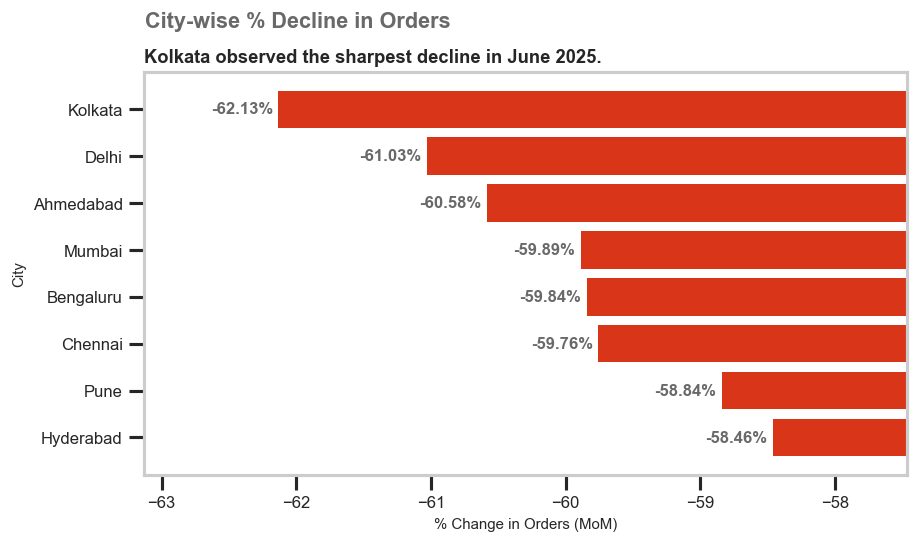

In [14]:
# --- Data Prep ---
df_city = df_order.merge(
    right=df_cust[['customer_id', 'city']], 
    on='customer_id',
    how= 'left'
)[['order_id', 'city', 'month']]

city_pivot = pd.pivot_table(
    data=df_city,
    index=['month'],
    columns='city',
    aggfunc='count'
)
city_pivot = city_pivot.pct_change().mul(100).round(3)

# --- Find month with max decline ---
row_with_max_decline = city_pivot.stack().idxmin()[0][0]

# --- Find city with max decline ---
city_with_max_decline = city_pivot.stack().idxmin()[0][1]

# --- Get previous month's % changes ---
pct_change_cities = (
    city_pivot.iloc[row_with_max_decline - 1]
    .reset_index(name='pct_change')
    .drop(columns=['level_0'])
    .sort_values(by='pct_change', ascending=False)
)

# --- Plot ---
plt.figure(figsize=(8, 5), dpi=120)
bars = plt.barh(
    y=pct_change_cities['city'],
    width=pct_change_cities['pct_change'],
    color=economist_red,
    alpha=0.9
)

plt.xlim(
    pct_change_cities['pct_change'].min() - 1,
    pct_change_cities['pct_change'].max() + 1
)

# --- Annotations on each bar ---
for bar in bars:
    width = bar.get_width()
    plt.text(
        width - 0.5,
        bar.get_y() + bar.get_height() / 2,
        f"{width:.2f}%",
        va='center',
        ha='left',
        fontsize=10,
        fontweight='bold',
        color='dimgray'
    )

# --- Titles ---
plt.suptitle(
    "City-wise % Decline in Orders",
    fontsize=13,
    fontweight='bold',
    color='dimgray',
    y=0.92,
    x=0.3312
)

plt.title(
    f"{city_with_max_decline} observed the sharpest decline in June 2025.",
    fontsize=11,
    fontweight='bold',
    loc='left'
)

plt.xlabel("% Change in Orders (MoM)", fontsize=9)
plt.ylabel("City", fontsize=9)

# --- Reduced tick label sizes ---
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# --- Removed grid ---
plt.grid(False)

plt.tight_layout()
plt.show()


Add:
- overall decline in total orders pre crisis v post-crisis as bar chart (filterable)
- overall decline in revenue details
- overall decline AOV


## Q3

3. Among restaurants with at least 50 pre-crisis orders, which top 10 high-volume restaurants experienced the largest percentage decline in order counts during the crisis period? 

In [15]:
df_rest_2 = df_order[['restaurant_id', 'order_id', 'month_name', 'month']].merge(
    right= df_rest,
    on= 'restaurant_id',
    how='left'
)
pre_crisis_rest = df_rest_2[df_rest_2['month'] < 6]

rest_name_grp = (
    pre_crisis_rest
    .groupby(by= 'restaurant_name')['order_id']
    .count()
    .reset_index(name= 'order_count')
)
high_vol_rest = (
    rest_name_grp
    .loc[rest_name_grp['order_count'] >= 50]
    .sort_values(by= 'order_count', ascending= False)
    .head(10)
)

post_crisis_rest = df_rest_2[
    (df_rest_2['restaurant_name'].isin(high_vol_rest['restaurant_name'])) &
    (df_rest_2['month'] >= 6)
]

rest_name_grp = (
    post_crisis_rest
    .groupby(by= 'restaurant_name')['order_id']
    .count()
    .reset_index(name= 'order_count')
)

rename_cols= {
    'restaurant_name': 'restaurant_name', 
    'order_count_x':'pre-crisis' , 
    'order_count_y': 'post-crisis'
}
combined = high_vol_rest.merge(right= rest_name_grp, on= 'restaurant_name').rename(columns= rename_cols)
combined['pct_decline'] = ((combined['post-crisis'] - combined['pre-crisis']) / combined['pre-crisis']) * 100
combined = combined.sort_values(by= 'pre-crisis', ascending = False)
combined 

,restaurant_name,pre-crisis,post-crisis,pct_decline
0,Punjabi Express Central,82,24,-70.731707
1,Classic Tandoor Heaven,80,21,-73.750000
2,Thindi Mane Pizza Cafe,77,24,-68.831169
3,Hot & Crispy Biryani Heaven,73,30,-58.904110
4,Thindi Mane Grill Darbar,73,21,-71.232877
5,Urban Kitchen Zone,67,10,-85.074627
6,Annapurna Mess Corner,66,23,-65.151515
7,Spicy Thali Hub,66,15,-77.272727
8,Hot & Crispy Darshini Clouds,66,19,-71.212121
9,Flavours of Express Zone,65,16,-75.384615


- donut chart of revenue by category type with line chart tool tip

In [16]:
# Ensure unique restaurant IDs
df_rest = df_rest.drop_duplicates(subset=['restaurant_id'])

# Merge
df_rest_2 = df_order[['restaurant_id', 'order_id', 'month_name', 'month']].merge(
    right=df_rest,
    on='restaurant_id',
    how='left'
)

# Pre-crisis
pre_crisis_rest = df_rest_2[df_rest_2['month'] < 6]

rest_name_grp = (
    pre_crisis_rest
    .groupby('restaurant_name')['order_id']
    .nunique()   # COUNTD equivalent
    .reset_index(name='pre-crisis')
)

# Top 10
high_vol_rest = (
    rest_name_grp[rest_name_grp['pre-crisis'] >= 50]
    .sort_values(by='pre-crisis', ascending=False)
    .head(10)
)

# Post-crisis for those restaurants
post_crisis_rest = df_rest_2[
    (df_rest_2['restaurant_name'].isin(high_vol_rest['restaurant_name'])) &
    (df_rest_2['month'] >= 6)
]

rest_name_grp_post = (
    post_crisis_rest
    .groupby('restaurant_name')['order_id']
    .nunique()   # COUNTD equivalent
    .reset_index(name='post-crisis')
)

# Combine
combined = high_vol_rest.merge(rest_name_grp_post, on='restaurant_name')
combined['pct_decline'] = ((combined['post-crisis'] - combined['pre-crisis']) / combined['pre-crisis']) * 100
combined = combined.sort_values(by='pre-crisis', ascending=False)
combined


,restaurant_name,pre-crisis,post-crisis,pct_decline
0,Punjabi Express Central,82,24,-70.731707
1,Classic Tandoor Heaven,80,21,-73.750000
2,Thindi Mane Pizza Cafe,77,24,-68.831169
3,Hot & Crispy Biryani Heaven,73,30,-58.904110
4,Thindi Mane Grill Darbar,73,21,-71.232877
5,Urban Kitchen Zone,67,10,-85.074627
6,Annapurna Mess Corner,66,23,-65.151515
7,Spicy Thali Hub,66,15,-77.272727
8,Hot & Crispy Darshini Clouds,66,19,-71.212121
9,Flavours of Express Zone,65,16,-75.384615


## Q4

4. Cancellation Analysis: What is the cancellation rate trend pre-crisis vs crisis, and which cities are most affected? 

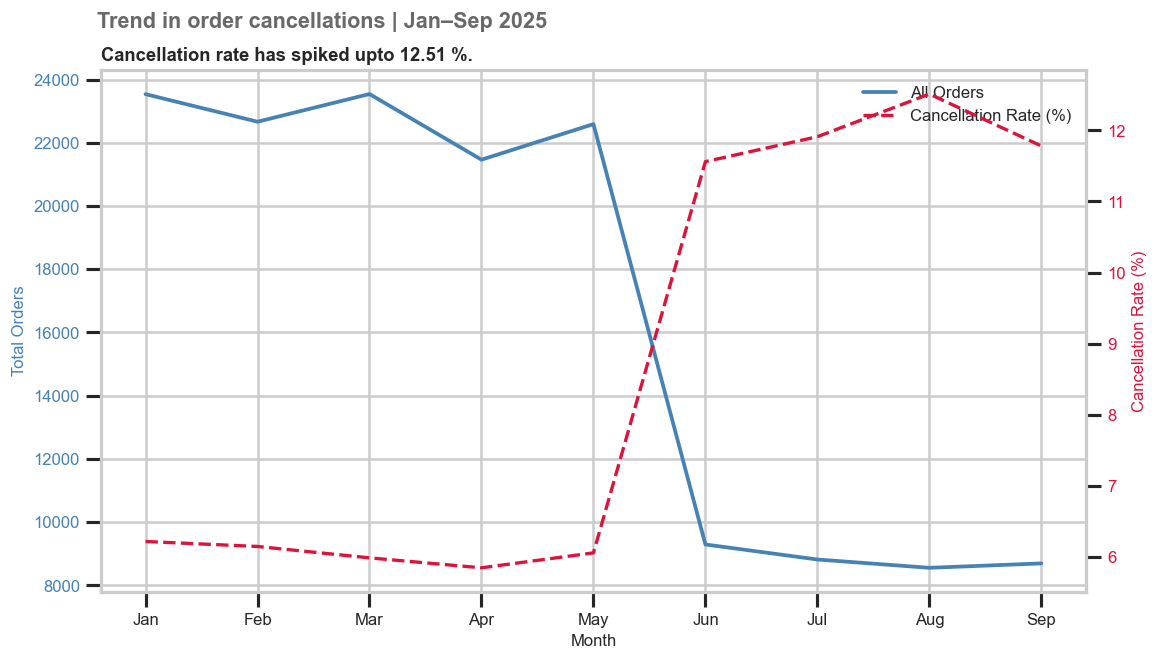

In [17]:
df_order_2 = df_order.merge(
    right= df_cust[['customer_id', 'city']],
    on= 'customer_id',
    how= 'left'
    
)
cancelled_orders_rec = df_order_2[df_order_2['is_cancelled'] == 'Y']

all_orders = (
    df_order_2
    .groupby(by= ['month', 'month_name'])['order_id']
    .size()
    .reset_index(name= 'orders')
    .drop(columns= 'month')
)
cancelled_orders = (
    cancelled_orders_rec
    .groupby(by= ['month', 'month_name'])['order_id']
    .size()
    .reset_index(name= 'orders')
    .drop(columns= 'month')
)

cancel_rate = pd.DataFrame({
    'month': all_orders.month_name,
    'all_orders' : all_orders['orders'],
    'cancelled_orders' : cancelled_orders['orders']
})
cancel_rate['cancellation_rate'] = ((cancel_rate['cancelled_orders'] / cancel_rate['all_orders']) * 100).round(2)

peak_cancel_rate = cancel_rate['cancellation_rate'].max()
peak_cancel_month = cancel_rate[cancel_rate['cancellation_rate'] == peak_cancel_rate]['month'].iloc[0]


fig, ax1 = plt.subplots(figsize=(10,6), dpi=120)

# Left Y-axis: Total Orders
ax1.plot(cancel_rate['month'], cancel_rate['all_orders'], color='steelblue', label='All Orders')
ax1.set_xlabel('Month', fontsize =10)
ax1.set_ylabel('Total Orders', color='steelblue', fontsize =10)
ax1.tick_params(axis='y', labelcolor='steelblue', labelsize= 10)
ax1.tick_params(axis='x', labelsize= 10)

# Right Y-axis: Cancellation Rate
ax2 = ax1.twinx()

ax2.plot(cancel_rate['month'], cancel_rate['cancellation_rate'], linestyle= '--',linewidth= 2, color='crimson', label='Cancellation Rate (%)')
ax2.set_ylabel('Cancellation Rate (%)', color='crimson', fontsize =10)
ax2.tick_params(axis='y', labelcolor='crimson', labelsize= 10)
ax2.tick_params(axis='x', labelsize= 10)

# Title and aesthetics
plt.suptitle( "Trend in order cancellations | Jan–Sep 2025", fontsize=13, fontweight='bold', color='dimgray', y=0.93, x=0.285 )
plt.title(f"Cancellation rate has spiked upto {peak_cancel_rate} %.", fontsize=11, fontweight='bold', loc= 'left')
plt.grid(False)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, frameon=False, fontsize=10)
fig.tight_layout()
plt.show()



## Q5

5. Delivery SLA: Measure average delivery time across phases. Did SLA compliance worsen significantly in the crisis period?

In [18]:
order_perf = df_order.merge(
    right= df_perf,
    how= 'left',
    on= 'order_id'
)[['order_id', 'month', 'month_name', 'actual_delivery_time_mins', 'expected_delivery_time_mins']]
order_perf['mins_delay'] = order_perf['actual_delivery_time_mins'] - order_perf['expected_delivery_time_mins']
order_perf['phases'] = order_perf['month_name'].apply(lambda x: 'Crisis' if x in ['Jun', 'Jul', 'Aug', 'Sep'] else 'Pre-crisis')
order_perf['sla_met'] = order_perf['mins_delay'].apply(lambda x: 1 if x <= 0 else 0)
order_perf.head()

,order_id,month,month_name,actual_delivery_time_mins,expected_delivery_time_mins,mins_delay,phases,sla_met
0,ORD202501023439,1,Jan,31,31,0,Pre-crisis,1
1,ORD202501012051,1,Jan,46,42,4,Pre-crisis,0
2,ORD202501019281,1,Jan,25,31,-6,Pre-crisis,1
3,ORD202501000124,1,Jan,29,41,-12,Pre-crisis,1
4,ORD202501006518,1,Jan,37,41,-4,Pre-crisis,1


In [19]:
sla_report = (
    order_perf
    .groupby(by= ['phases'])
    .agg(
        total_orders= ('order_id', 'count'),
        total_sla_met = ('sla_met', 'sum'),
        avg_expected_time= ('expected_delivery_time_mins', 'mean'),
        avg_actual_time= ('actual_delivery_time_mins', 'mean'),

    )
    .reset_index()
    .sort_values(by= 'phases', ascending= False)
)
sla_report['total_sla_not_met'] = sla_report['total_orders'] - sla_report['total_sla_met']

sla_report['sla_compliance_rate'] = ((sla_report['total_sla_met'] / sla_report['total_orders']) * 100).round(2)

report_order = ['phases', 'total_orders', 'total_sla_met', 'total_sla_not_met', 'sla_compliance_rate', 'avg_expected_time', 'avg_actual_time']
sla_report = sla_report[report_order]

delay_computation = [
    [order_perf[order_perf['phases'] == 'Pre-crisis']['mins_delay'].mean(),  # Pre-crisis
     order_perf[order_perf['phases'] == 'Crisis']['mins_delay'].mean()] # Crisis
]
delay_mins = pd.DataFrame({
    'phases' : ['Pre-crisis', 'Crisis'],
    'avg_delay_min' : delay_computation[0]
})
sla_compliance_summary = (
    sla_report
    .merge(right= delay_mins, on= 'phases')
    .set_index(keys= 'phases')
    .transpose()
    .round(2)
)

print(sla_compliance_summary)

from scipy.stats import ttest_ind

delay_pre_crisis = order_perf.loc[order_perf['phases'] == 'Pre-crisis', 'mins_delay']
delay_crisis = order_perf.loc[order_perf['phases'] == 'Crisis', 'mins_delay']

t_stat, p_val = ttest_ind(
    a= delay_pre_crisis,
    b= delay_crisis,
    equal_var= False,
    nan_policy= 'omit'
)
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.5f}")

if p_val < 0.05:
    print("✅ SLA performance worsened significantly during the crisis period.")
else:
    print("❌ No statistically significant difference in SLA performance.")


phases               Pre-crisis    Crisis
total_orders          113806.00  35360.00
total_sla_met          49625.00   4315.00
total_sla_not_met      64181.00  31045.00
sla_compliance_rate       43.60     12.20
avg_expected_time         37.50     42.52
avg_actual_time           39.52     60.12
avg_delay_min              2.02     17.60
T-statistic: -194.87
P-value: 0.00000
✅ SLA performance worsened significantly during the crisis period.


## Q6

6. Ratings Fluctuation: Track average customer rating month-by-month. Which months saw the sharpest drop?

In [20]:
df_rate['review_timestamp'] = pd.to_datetime(df_rate['review_timestamp'], format= "%d-%m-%Y %H:%M")
df_rate['month'] = df_rate['review_timestamp'].dt.month

df_rate['month_name'] = (
    df_rate['review_timestamp']
    .dt
    .month_name()
    .str[0:3]
)
rating_summary = (
    df_rate
    .groupby(by= ['month', 'month_name'])['rating']
    .mean()
    .reset_index(name= 'avg_rating')
)
rating_summary['pct_change'] = (
    rating_summary['avg_rating']
    .pct_change(periods= 1)
    .mul(100)
    .round(2)
)
rating_summary

,month,month_name,avg_rating,pct_change
0,1.0,Jan,4.576351,NaN
1,2.0,Feb,4.399887,-3.86
2,3.0,Mar,4.737654,7.68
3,4.0,Apr,4.297022,-9.30
4,5.0,May,4.488336,4.45
5,6.0,Jun,2.625666,-41.50
6,7.0,Jul,2.689794,2.44
7,8.0,Aug,2.402017,-10.70
8,9.0,Sep,2.305791,-4.01


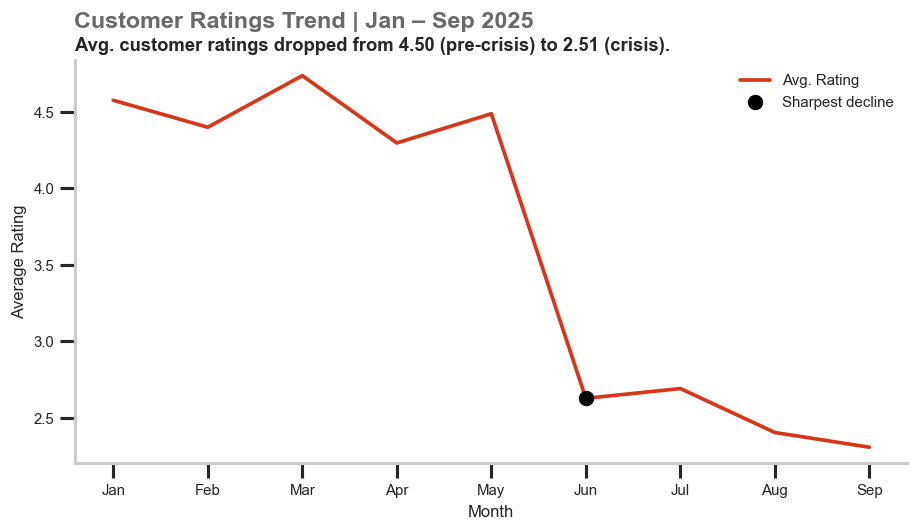

In [21]:
row_with_max_decline = rating_summary['pct_change'].idxmin()
month_with_max_decline = rating_summary.iloc[row_with_max_decline,1]
rating_with_max_decline = rating_summary.iloc[row_with_max_decline,2]

pre_crisis_rating = rating_summary[rating_summary['month'] < 6]['avg_rating'].mean()
crisis_rating = rating_summary[rating_summary['month'] >= 6]['avg_rating'].mean()

# --- Economist-style Visualization for Customer Ratings ---

plt.figure(figsize=(8,5), dpi=120)

# --- Line plot ---
plt.plot(
    rating_summary['month_name'],
    rating_summary['avg_rating'],
    color= economist_red,  # Economist red
    linewidth=2.2,
    markersize=6,
    alpha=0.9,
    label= 'Avg. Rating'
)

# --- Highlight the month with maximum decline ---
plt.scatter(
    x=month_with_max_decline,
    y=rating_with_max_decline,
    color='black',
    s=60,
    zorder=5,
    label='Sharpest decline'
)

# --- Titles ---
plt.suptitle(
    "Customer Ratings Trend | Jan – Sep 2025",
    fontsize=14,
    fontweight='bold',
    color='dimgray',
    x=0.3375,
    y=0.90
)

plt.title(
    f"Avg. customer ratings dropped from {pre_crisis_rating:.2f} (pre-crisis) "
    f"to {crisis_rating:.2f} (crisis).",
    fontsize=11,
    fontweight='bold',
    loc='left'
)

# --- Styling ---
plt.ylabel("Average Rating", fontsize=10)
plt.xlabel("Month", fontsize=10)
plt.ylim(rating_summary['avg_rating'].min() - 0.1, rating_summary['avg_rating'].max() + 0.1)

plt.tick_params(axis='x', labelsize=9)
plt.tick_params(axis='y', labelsize=9)
plt.grid(False)

# --- Axis spine styling (Economist-style minimalism) ---
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# --- Legend ---
plt.legend(frameon=False, fontsize=9, loc='upper right')

plt.tight_layout()
plt.show()


## Q7

7. Sentiment Insights: During the crisis period, identify the most frequently occurring negative keywords in customer review texts. (Hint: Use a Word Cloud visual in Power BI to visualize the findings.) 

In [22]:
crisis_rating_df = df_rate[
    (df_rate['month'] >= 6) & 
    (df_rate['sentiment_score'] <= 0.35)
]['review_text'].value_counts()

negative_text_crisis = crisis_rating_df.head(5)

negative_text_crisis

review_text
Food quality is not good              1962
Food safety issue                     1076
Cold food                             1048
Portion size smaller than expected    1045
Not worth the price                   1037
Name: count, dtype: int64

In [23]:
df_rate_phases = df_rate.copy()

df_rate_phases['phases'] = df_rate_phases['month_name'].apply(lambda x: 'Crisis' if x in ['Jun', 'Jul', 'Aug', 'Sep'] else 'Pre-crisis')
df_rate_phases['sentiment_label'] = df_rate_phases['sentiment_score'].apply(lambda x : 'Negative' if x < 0.35 else 'Positive')

sentiment_grp = (
    df_rate_phases
    .groupby(by= ['phases','sentiment_label'])
    .agg(
        review_count= ('order_id', 'count'),
        avg_sentiment_score= ('sentiment_score', 'mean')
    ).reset_index()
    .sort_values(by= 'sentiment_label', ascending= False)
    .sort_values(by= 'phases', ascending= False)
)

all_reviews_precrisis = df_rate_phases[df_rate_phases['phases'] == 'Pre-crisis']['order_id'].count()
all_reviews_crisis = df_rate_phases[df_rate_phases['phases'] == 'Crisis']['order_id'].count()

def pct_share(x):

  if x['phases'] == 'Pre-crisis':
    return (x['review_count'] / all_reviews_precrisis * 100)
  
  elif x['phases'] == 'Crisis':
    return (x['review_count'] / all_reviews_crisis * 100)

  else:
    None

sentiment_grp['pct_share'] = sentiment_grp[['phases', 'review_count']].apply(lambda x: pct_share(x), axis= 1)
sentiment_grp = sentiment_grp[['phases', 'sentiment_label', 'review_count', 'pct_share', 'avg_sentiment_score']]

sentiment_grp

,phases,sentiment_label,review_count,pct_share,avg_sentiment_score
3,Pre-crisis,Positive,52629,98.844940,0.757621
2,Pre-crisis,Negative,615,1.155060,0.260732
1,Crisis,Positive,573,3.677556,0.488918
0,Crisis,Negative,15008,96.322444,-0.273241


## Q8

8. Revenue Impact: Estimate revenue loss from pre-crisis vs crisis (based on subtotal, discount, and delivery fee).

(subtotal_amount - discount_amount) + delivery_fee = total_amount

In [24]:
df_order['phases'] = df_order['month_name'].apply(lambda x : 'Crisis' if x in ['Jun', 'Jul', 'Aug', 'Sep'] else 'Pre-crisis')
df_order.head()

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,month,month_name,phases
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N,1,Jan,Pre-crisis
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N,1,Jan,Pre-crisis
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N,1,Jan,Pre-crisis
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N,1,Jan,Pre-crisis
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N,1,Jan,Pre-crisis


In [25]:
rev_summary = (
    df_order
    .groupby(by= 'phases')
    .agg(
        total_revenue= ('total_amount', 'sum'),
        avg_revenue= ('total_amount', 'mean')
    )
    .sort_index(ascending= False)
)
rev_summary = rev_summary.transpose()
rev_summary['pct_change'] = ((rev_summary['Crisis'] - rev_summary['Pre-crisis']) / rev_summary['Pre-crisis']) * 100
rev_summary.astype(int)

phases,Pre-crisis,Crisis,pct_change
total_revenue,37620964,10940151,-70
avg_revenue,330,309,-6


In [26]:
mom_rev_summary = (
    df_order
    .groupby(by= ['month', 'month_name'])
    .agg(
        total_revenue= ('total_amount', 'sum'),
        avg_revenue= ('total_amount', 'mean')
    )
    .reset_index()
    .drop(columns= ['month'])
)
mom_rev_summary['pct_change'] = (
    mom_rev_summary['total_revenue']
    .pct_change(1)
    .mul(100)
    .round(2)
)
mom_rev_summary

,month_name,total_revenue,avg_revenue,pct_change
0,Jan,7774293.34,330.272881,NaN
1,Feb,7469953.31,329.551917,-3.91
2,Mar,7802568.99,331.417788,4.45
3,Apr,7126972.24,332.012123,-8.66
4,May,7447176.37,329.652356,4.49
5,Jun,2887866.91,310.757227,-61.22
6,Jul,2724623.29,308.984270,-5.65
7,Aug,2642856.29,308.925341,-3.00
8,Sep,2684804.82,308.811228,1.59


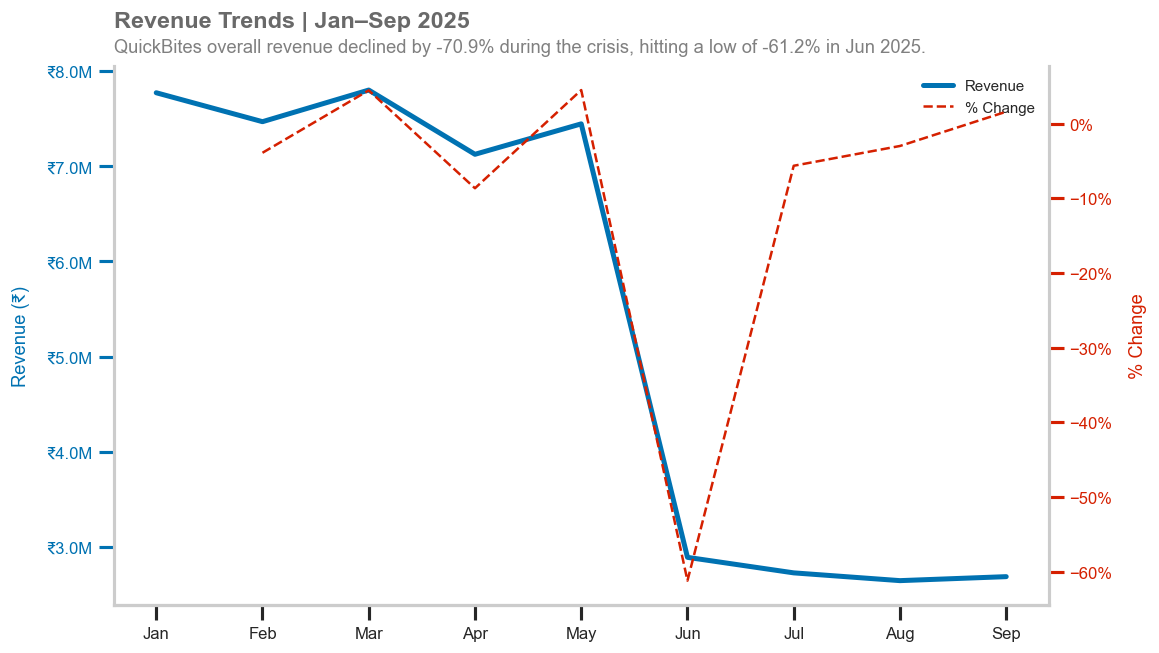

In [27]:
min_pct_change = mom_rev_summary['pct_change'].min()
row_min_pct_change = mom_rev_summary['pct_change'].idxmin()
month_min_pct_change = mom_rev_summary.iloc[row_min_pct_change, 0]
overall_loss = rev_summary.loc['total_revenue','pct_change']

# Figure setup
fig, ax1 = plt.subplots(figsize=(10, 6), dpi=120)

# --- Left axis (Revenue) ---
ax1.plot(
    mom_rev_summary['month_name'],
    mom_rev_summary['total_revenue'],
    color=economist_blue,
    linewidth=3,
    label='Revenue'
)
ax1.set_ylabel("Revenue (₹)", fontsize=11, color=economist_blue, labelpad=10)
ax1.yaxis.set_major_formatter(lambda x, _: f"₹{x/1e6:.1f}M")  # format in millions with ₹ symbol

# --- Right axis (% Change) ---
ax2 = ax1.twinx()
ax2.plot(
    mom_rev_summary['month_name'],
    mom_rev_summary['pct_change'],
    color=economist_red,
    linestyle='--',
    linewidth=1.5,
    label='% Change'
)
ax2.set_ylabel("% Change", fontsize=11, color=economist_red, labelpad=10)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

# --- Titles ---
plt.suptitle(
    "Revenue Trends | Jan–Sep 2025",
    fontsize=14,
    fontweight='bold',
    color='dimgray',
    x=0.26,
    y=0.92
)
plt.title(
    f"QuickBites overall revenue declined by {overall_loss:.1f}% during the crisis, hitting a low of {min_pct_change:.1f}% in {month_min_pct_change} 2025.",
    fontsize=11,
    color='gray',
    loc='left',
    pad=8
)

# --- Style Tweaks ---
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax1.tick_params(axis='x', labelrotation=0, labelsize=10)
ax1.tick_params(axis='y', colors=economist_blue,labelsize=10)
ax2.tick_params(axis='y', colors=economist_red, labelsize=10)

ax1.grid(False)
ax2.grid(False)

# --- Legends ---
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right', frameon=False, fontsize=9)

plt.tight_layout()
plt.show()

## Q9

9. Loyalty Impact: Among customers who placed five or more orders before the crisis, determine how many stopped ordering during the crisis, and out of those, how many had an average rating above 4.5?

In [28]:
# --- Merge ratings ---
df_order_3 = df_order.merge(
    right=df_rate[['order_id', 'rating']],
    on='order_id',
    how='left'
)

# --- Identify pre-crisis loyal customers ---
pre_crisis_orders = df_order_3[df_order_3['phases'] == 'Pre-crisis']
cust_summ = (
    pre_crisis_orders
    .groupby('customer_id')
    .agg(
        total_orders=('order_id', 'count'),
        avg_rating=('rating', 'mean')
    )
    .reset_index()
)
loyal_customers = cust_summ[cust_summ['total_orders'] >= 5]

# --- Identify customers who stopped ordering in crisis ---
crisis_orders = df_order_3[df_order_3['phases'] == 'Crisis']
active_in_crisis = crisis_orders['customer_id'].unique()
stopped_during_crisis = loyal_customers[~loyal_customers['customer_id'].isin(active_in_crisis)]

# --- Among stopped, find high-rating customers ---
stopped_high_rating = stopped_during_crisis[stopped_during_crisis['avg_rating'] >= 4.5]

# --- Create summary table ---
loyalty_summary = pd.DataFrame({
    'Metric': [
        'Total active customers (Pre-crisis)',
        'Loyal customers (≥5 orders)',
        'Stopped ordering during Crisis',
        'Stopped & Avg Rating ≥4.5'
    ],
    'Count': [
        pre_crisis_orders['customer_id'].nunique(),
        loyal_customers['customer_id'].nunique(),
        stopped_during_crisis['customer_id'].nunique(),
        stopped_high_rating['customer_id'].nunique()
    ]
})

loyalty_summary


,Metric,Count
0,Total active customers (Pre-crisis),86824
1,Loyal customers (≥5 orders),58
2,Stopped ordering during Crisis,49
3,Stopped & Avg Rating ≥4.5,30


In [29]:
loyalty_summary.to_csv('D:/[01] SKILLS/[00] Projects/14 Crisis Management/data/data-q9.csv', index= False)

## Q10

10. Customer Lifetime Decline: Which high-value customers (top 5% by total spend before the crisis) showed the largest drop in order frequency and ratings during the crisis? What common patterns (e.g., location, cuisine preference, delivery delays) do they share? 

In [30]:
cust_spend_summ = (
    pre_crisis_orders
    .groupby(by= 'customer_id')
    .agg(total_spend= ('total_amount', 'sum'))
    .reset_index()
)
filter_threshold = cust_spend_summ['total_spend'].quantile(0.95)
top_5_pct_cust_precrisis = cust_spend_summ[cust_spend_summ['total_spend'] > filter_threshold]['customer_id']
top_5_pct_cust_precrisis.head()

9     CUST000020
24    CUST000073
30    CUST000088
70    CUST000163
81    CUST000190
Name: customer_id, dtype: object

In [31]:
filter_threshold

np.float64(923.4469999999999)

In [32]:
df_perf['delivery_delayed_min'] = df_perf['actual_delivery_time_mins'] - df_perf['expected_delivery_time_mins']
df_perf['is_order_delayed'] = df_perf['delivery_delayed_min'].apply(lambda x: 1 if x > 0 else 0)

df_order_enriched = (
    df_order
    .merge(
        right= df_rate[['order_id','rating', 'sentiment_score']],
        on= 'order_id',
        how= 'left'
    )
    .merge(
        right= df_perf[['order_id', 'delivery_delayed_min', 'is_order_delayed']],
        on= 'order_id',
        how= 'left'
    )
    .merge(
        right= df_cust[['customer_id', 'city']],
        on= 'customer_id',
        how= 'left'
    )
    .merge(
        right= df_rest[['restaurant_id', 'cuisine_type']],
        on= 'restaurant_id',
        how= 'left'
    )
)
df_order_enriched['is_cod'] = df_order_enriched['is_cod'].map({'N':0, 'Y':1})
df_order_enriched['is_cancelled'] = df_order_enriched['is_cancelled'].map({'N':0, 'Y':1})

cust_report = (
    df_order_enriched
    .groupby(by= ['customer_id', 'phases'])
    .agg(
        total_order = ('order_id', 'count'),
        total_spend= ('total_amount', 'sum'),
        avg_rating= ('rating', 'mean'),
        avg_sentiment_score= ('sentiment_score', 'mean'),
        avg_delay_min= ('delivery_delayed_min', 'mean'),
        total_delayed_orders= ('is_order_delayed', 'sum'),
        total_cancellation= ('is_cancelled', 'sum'),
        top_city=('city', lambda x: x.mode()[0] if len(x.mode())>0 else None),
        top_cuisine=('cuisine_type', lambda x: x.mode()[0] if len(x.mode())>0 else None)
    )
    .reset_index()
)
top_5_pct_cust_report = (
    cust_report[cust_report['customer_id']
    .isin(values= top_5_pct_cust_precrisis)]
    .sort_values(by= 'total_spend', ascending= False)
)
top_5_pct_cust_report.head()

,customer_id,phases,total_order,total_spend,avg_rating,avg_sentiment_score,avg_delay_min,total_delayed_orders,total_cancellation,top_city,top_cuisine
46292,CUST077722,Pre-crisis,5,2715.18,4.40,0.700,1.400000,3,0,Delhi,North Indian
106856,CUST179266,Pre-crisis,6,2404.06,4.60,0.800,-1.833333,3,1,Delhi,Healthy
75152,CUST125990,Pre-crisis,5,2403.16,4.70,0.850,4.200000,3,0,Chennai,Biryani
97534,CUST163628,Pre-crisis,5,2397.58,4.75,0.875,-2.800000,2,0,Chennai,South Indian
98654,CUST165515,Pre-crisis,5,2349.96,4.95,0.975,2.800000,4,0,Pune,Chinese


In [33]:
top_5_pct_cust_report.shape

(5036, 11)

In [34]:
values= ['total_order', 'total_spend', 'avg_rating', 'avg_sentiment_score', 'avg_delay_min', 'total_delayed_orders', 'total_cancellation']

pivot_report = (
    top_5_pct_cust_report
    .pivot_table(
        index= 'customer_id',
        columns= 'phases',
        values= values
    )
    .fillna(0)
    .reset_index()
)
pivot_report.columns= ['_'.join(col).strip() for col in pivot_report.columns.values]
pivot_report['status'] = np.select(
    condlist= ([
         (pivot_report['total_order_Pre-crisis'] > 0) & (pivot_report['total_order_Crisis'] == 0),
         (pivot_report['total_order_Crisis'] < pivot_report['total_order_Pre-crisis']) & (pivot_report['total_order_Crisis'] > 0)
    ]),
    choicelist= ([
        'stopped',
        'declined'
    ]),
    default= 'none'
)
pivot_report = pivot_report.merge(
    right= df_cust[['customer_id', 'city']],
    left_on= 'customer_id_',
    right_on='customer_id',
    how= 'left'
).drop(columns= ['customer_id_'])
pivot_report.head()

,avg_delay_min_Crisis,avg_delay_min_Pre-crisis,avg_rating_Crisis,avg_rating_Pre-crisis,avg_sentiment_score_Crisis,avg_sentiment_score_Pre-crisis,total_cancellation_Crisis,total_cancellation_Pre-crisis,total_delayed_orders_Crisis,total_delayed_orders_Pre-crisis,total_order_Crisis,total_order_Pre-crisis,total_spend_Crisis,total_spend_Pre-crisis,status,customer_id,city
0,0.0,14.000000,0.0,4.55,0.0,0.775,0.0,0.0,0.0,3.0,0.0,3.0,0.00,1139.18,stopped,CUST000020,Pune
1,33.0,0.000000,0.0,4.30,0.0,0.650,0.0,0.0,1.0,1.0,1.0,2.0,546.91,930.95,declined,CUST000073,Hyderabad
2,0.0,-0.333333,0.0,4.60,0.0,0.800,0.0,0.0,0.0,2.0,0.0,3.0,0.00,1340.03,stopped,CUST000088,Pune
3,0.0,-9.500000,0.0,4.00,0.0,0.500,0.0,0.0,0.0,0.0,0.0,2.0,0.00,931.05,stopped,CUST000163,Mumbai
4,0.0,17.000000,0.0,4.70,0.0,0.850,0.0,0.0,0.0,2.0,0.0,2.0,0.00,1026.29,stopped,CUST000190,Pune


In [35]:
pivot_report_stopped = pivot_report[pivot_report['status'] == 'stopped'].drop(columns= ['status'])
pivot_report_stopped.head()

,avg_delay_min_Crisis,avg_delay_min_Pre-crisis,avg_rating_Crisis,avg_rating_Pre-crisis,avg_sentiment_score_Crisis,avg_sentiment_score_Pre-crisis,total_cancellation_Crisis,total_cancellation_Pre-crisis,total_delayed_orders_Crisis,total_delayed_orders_Pre-crisis,total_order_Crisis,total_order_Pre-crisis,total_spend_Crisis,total_spend_Pre-crisis,customer_id,city
0,0.0,14.000000,0.0,4.55,0.0,0.775,0.0,0.0,0.0,3.0,0.0,3.0,0.0,1139.18,CUST000020,Pune
2,0.0,-0.333333,0.0,4.60,0.0,0.800,0.0,0.0,0.0,2.0,0.0,3.0,0.0,1340.03,CUST000088,Pune
3,0.0,-9.500000,0.0,4.00,0.0,0.500,0.0,0.0,0.0,0.0,0.0,2.0,0.0,931.05,CUST000163,Mumbai
4,0.0,17.000000,0.0,4.70,0.0,0.850,0.0,0.0,0.0,2.0,0.0,2.0,0.0,1026.29,CUST000190,Pune
6,0.0,2.500000,0.0,4.10,0.0,0.550,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1082.22,CUST000394,Mumbai


In [36]:
pivot_report_declined = pivot_report[pivot_report['status'] == 'declined'].drop(columns= ['status'])
pivot_report_declined.head()

,avg_delay_min_Crisis,avg_delay_min_Pre-crisis,avg_rating_Crisis,avg_rating_Pre-crisis,avg_sentiment_score_Crisis,avg_sentiment_score_Pre-crisis,total_cancellation_Crisis,total_cancellation_Pre-crisis,total_delayed_orders_Crisis,total_delayed_orders_Pre-crisis,total_order_Crisis,total_order_Pre-crisis,total_spend_Crisis,total_spend_Pre-crisis,customer_id,city
1,33.0,0.000000,0.0,4.300000,0.0,0.650000,0.0,0.0,1.0,1.0,1.0,2.0,546.91,930.95,CUST000073,Hyderabad
5,0.0,-8.000000,3.8,4.400000,0.4,0.700000,0.0,0.0,0.0,0.0,1.0,3.0,559.07,1132.03,CUST000269,Delhi
14,-6.0,9.500000,0.0,4.600000,0.0,0.800000,0.0,0.0,0.0,3.0,1.0,4.0,404.70,1404.38,CUST000922,Mumbai
16,46.0,3.333333,0.0,5.000000,0.0,1.000000,0.0,0.0,1.0,2.0,1.0,3.0,397.13,968.28,CUST000930,Bengaluru
20,16.0,-5.000000,0.0,4.533333,0.0,0.766667,0.0,0.0,1.0,1.0,1.0,4.0,234.38,1814.77,CUST001122,Bengaluru


In [37]:
total_cust_5_pct = pivot_report['customer_id'].nunique()
stopped_cust = pivot_report_stopped['customer_id'].nunique()
pct_stopped = round(stopped_cust / total_cust_5_pct *100)
continued_cust = pivot_report_declined['customer_id'].nunique()

total_revenue_precrisis = df_order_enriched[df_order_enriched['phases'] == 'Pre-crisis']['total_amount'].sum()
total_revenue_top5_precrisis = pivot_report['total_spend_Pre-crisis'].sum()
lost_revenue_potential = pivot_report_stopped['total_spend_Pre-crisis'].sum()

rev_contribution_top_5pct = round(total_revenue_top5_precrisis / total_revenue_precrisis*100)
rev_pct_lost = round(lost_revenue_potential/total_revenue_precrisis *100)


In [38]:
print(f"""Our top 5% customer based ({total_cust_5_pct:,} customers) generated {rev_contribution_top_5pct}% to the total revenue before crisis.
However, {pct_stopped}% of them ({stopped_cust:,} customers) have stopped ordering during crisis and therefore, 
we have lost {rev_pct_lost}% from the total revenue potential, assuming similar purchase pattern.
""") 

Our top 5% customer based (4,342 customers) generated 13% to the total revenue before crisis.
However, 84% of them (3,648 customers) have stopped ordering during crisis and therefore, 
we have lost 11% from the total revenue potential, assuming similar purchase pattern.



In [39]:
revenue_pie= pd.DataFrame({
    'parameter' : [ "Rest Customer Base", "Revenue by top 5%"],
    'value': [total_revenue_precrisis - total_revenue_top5_precrisis, total_revenue_top5_precrisis]
})
revenue_pie

,parameter,value
0,Rest Customer Base,32723509.08
1,Revenue by top 5%,4897455.17


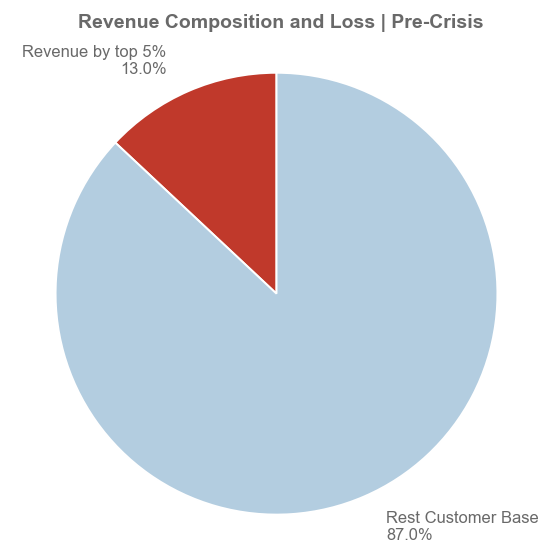

In [40]:
# --- Sort and define palette ---
revenue_pie_sorted = revenue_pie.sort_values(by='value', ascending=True)
revenue_pie_sorted['pct'] = round( revenue_pie['value'] / total_revenue_precrisis * 100,0)

colors = ['#c0392b', '#b3cde0', '#6497b1']  # red for loss + blue gradient

# --- Compute percentage for custom labels ---
revenue_pie_sorted['label'] = (
    revenue_pie_sorted['parameter'] + "\n" + revenue_pie_sorted['pct'].astype(str) + "%"
)

# --- Plot ---
fig, ax = plt.subplots(figsize=(4.5, 4.5), dpi=140)  # smaller and higher DPI

wedges, texts = ax.pie(
    revenue_pie_sorted['value'],
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

# --- Add custom data labels ---
for i, w in enumerate(wedges):
    ang = (w.theta2 - w.theta1)/2. + w.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    ha = 'left' if x > 0 else 'right'
    
    ax.text(
        x*1.25, y*1.15,  # pushed slightly further out
        revenue_pie_sorted['label'].iloc[i],
        ha=ha,
        va='center',
        fontsize=8.5,
        color='dimgray'
    )

# --- Titles ---
plt.suptitle(
    f"""Revenue Composition and Loss | Pre-Crisis""",
    fontsize=10, fontweight='bold', color='dimgray', y=0.90
)
plt.title(
    "",
    fontsize=9, color='gray',  pad=6
)

ax.axis('equal')  # keep circular
plt.tight_layout()
plt.show()


In [41]:
revenue_pie_sorted.to_csv('D:/[01] SKILLS/[00] Projects/14 Crisis Management/data/data-q10.csv', index= False)

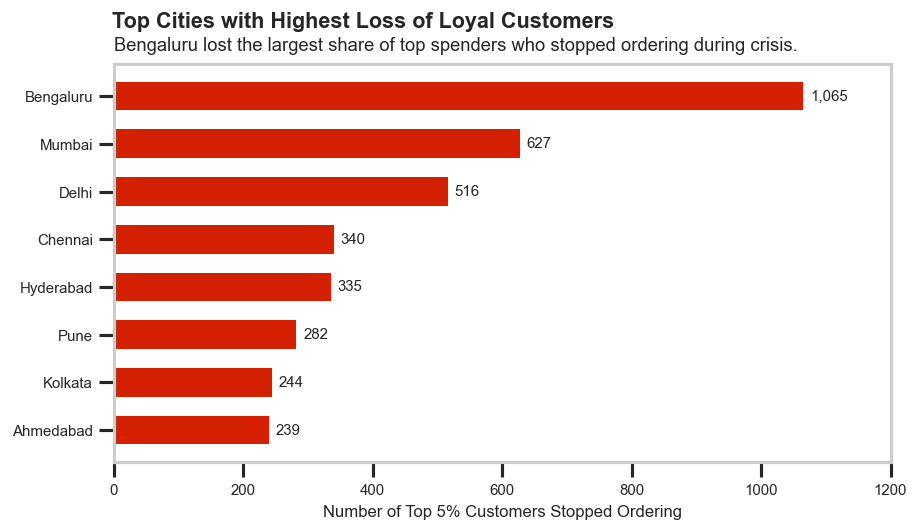

In [42]:
city_cust_stopped = pivot_report_stopped['city'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(8,5), dpi=120)

# Sort descending for clearer ranking (optional since already ascending)
city_cust_stopped = city_cust_stopped.sort_values(ascending=True)

# Create bars and capture the BarContainer
bars = plt.barh(
    y=city_cust_stopped.index,
    width=city_cust_stopped.values,
    color=economist_red,
    height=0.6
)

# Remove gridlines
plt.grid(False)

# Add value labels
for bar in bars:
    plt.text(
        bar.get_width() + (max(city_cust_stopped.values) * 0.01),  # small offset
        bar.get_y() + bar.get_height()/2,
        f"{int(bar.get_width()):,}",  # formatted with comma separator
        va='center',
        ha='left',
        fontsize=9
    )

# Titles — concise, narrative-driven
plt.suptitle(
    "Top Cities with Highest Loss of Loyal Customers",
    fontsize=13, fontweight='bold', x=0.40, y=0.90
)
plt.title(
    "Bengaluru lost the largest share of top spenders who stopped ordering during crisis.",
    fontsize=11, loc='left', pad=8
)

# Axis labels and formatting
plt.xlabel("Number of Top 5% Customers Stopped Ordering", fontsize=10)
plt.ylabel("")
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.xlim(0,1200)

plt.tight_layout()
plt.show()


In [43]:
city_cust_stopped.to_csv('D:/[01] SKILLS/[00] Projects/14 Crisis Management/data/data-q10-v2.csv')

- add a customer list

In [44]:
pivot_report_declined = pivot_report_declined.loc[:, ~pivot_report_declined.columns.duplicated()]

agg_precrisis_report = (
    pivot_report_declined
    .groupby('customer_id', as_index=False)
    .agg(
        total_orders=('total_order_Pre-crisis', 'sum'),
        total_spend=('total_spend_Pre-crisis', 'sum'),
        total_delayed_orders=('total_delayed_orders_Pre-crisis', 'sum'),
        avg_rating=('avg_rating_Pre-crisis', 'mean'),
        avg_sentiment_score=('avg_sentiment_score_Pre-crisis', 'mean'),
        total_cancellations= ('total_cancellation_Pre-crisis', 'sum')
    )
)

agg_crisis_report = (
    pivot_report_declined
    .groupby('customer_id', as_index=False)
    .agg(
        total_orders=('total_order_Crisis', 'sum'),
        total_spend=('total_spend_Crisis', 'sum'),
        total_delayed_orders=('total_delayed_orders_Crisis', 'sum'),
        avg_rating=('avg_rating_Crisis', 'mean'),
        avg_sentiment_score=('avg_sentiment_score_Crisis', 'mean'),
        total_cancellations= ('total_cancellation_Crisis', 'sum')
    )
)

agg_precrisis_report.merge(right= agg_crisis_report)

,customer_id,total_orders,total_spend,total_delayed_orders,avg_rating,avg_sentiment_score,total_cancellations


In [45]:
pivot_report_declined.head()

,avg_delay_min_Crisis,avg_delay_min_Pre-crisis,avg_rating_Crisis,avg_rating_Pre-crisis,avg_sentiment_score_Crisis,avg_sentiment_score_Pre-crisis,total_cancellation_Crisis,total_cancellation_Pre-crisis,total_delayed_orders_Crisis,total_delayed_orders_Pre-crisis,total_order_Crisis,total_order_Pre-crisis,total_spend_Crisis,total_spend_Pre-crisis,customer_id,city
1,33.0,0.000000,0.0,4.300000,0.0,0.650000,0.0,0.0,1.0,1.0,1.0,2.0,546.91,930.95,CUST000073,Hyderabad
5,0.0,-8.000000,3.8,4.400000,0.4,0.700000,0.0,0.0,0.0,0.0,1.0,3.0,559.07,1132.03,CUST000269,Delhi
14,-6.0,9.500000,0.0,4.600000,0.0,0.800000,0.0,0.0,0.0,3.0,1.0,4.0,404.70,1404.38,CUST000922,Mumbai
16,46.0,3.333333,0.0,5.000000,0.0,1.000000,0.0,0.0,1.0,2.0,1.0,3.0,397.13,968.28,CUST000930,Bengaluru
20,16.0,-5.000000,0.0,4.533333,0.0,0.766667,0.0,0.0,1.0,1.0,1.0,4.0,234.38,1814.77,CUST001122,Bengaluru


In [46]:
# Define aggregation types for each column
agg_precrisis = {
    'total_order_Pre-crisis': 'sum',
    'total_spend_Pre-crisis': 'sum',
    'total_delayed_orders_Pre-crisis': 'sum',
    'avg_rating_Pre-crisis': 'mean',
    'avg_sentiment_score_Pre-crisis': 'mean',
    'total_cancellation_Pre-crisis': 'sum'
}

agg_crisis = {
    'total_order_Crisis': 'sum',
    'total_spend_Crisis': 'sum',
    'total_delayed_orders_Crisis': 'sum',
    'avg_rating_Crisis': 'mean',
    'avg_sentiment_score_Crisis': 'mean',
    'total_cancellation_Crisis': 'sum'
}

# Aggregate values
pre_crisis = pivot_report_declined[list(agg_precrisis.keys())].agg(agg_precrisis).tolist()
crisis = pivot_report_declined[list(agg_crisis.keys())].agg(agg_crisis).tolist()

parameter = [
    'total_order',
    'total_spend',
    'total_delayed_orders',
    'avg_rating',
    'avg_sentiment_score',
    'total_cancellation'
]

agg_report = pd.DataFrame({
    'parameters': parameter,
    'pre-crisis': pre_crisis,
    'crisis': crisis
})

agg_report.round(2)

,parameters,pre-crisis,crisis
0,total_order,1824.00,694.00
1,total_spend,742484.87,215005.37
2,total_delayed_orders,1005.00,604.00
3,avg_rating,3.83,1.06
4,avg_sentiment_score,0.64,-0.10
5,total_cancellation,28.00,86.00


In [47]:
df_transposed = agg_report.transpose()
df_transposed.columns = df_transposed.iloc[0]
df_transposed = df_transposed[1:]
df_transposed.to_csv('D:/[01] SKILLS/[00] Projects/14 Crisis Management/data/data-q10-v3.csv')

# Secondary


In [48]:
df_cust.head()

,customer_id,signup_date,city,acquisition_channel
0,CUST000007,21-03-2025,Pune,Organic
1,CUST000008,07-02-2025,Kolkata,Referral
2,CUST000009,25-02-2025,Delhi,Paid
3,CUST000010,28-01-2025,Hyderabad,Paid
4,CUST000011,18-01-2025,Kolkata,Organic


In [49]:
df_cust['acquisition_channel'].value_counts()

acquisition_channel
Organic     55382
Paid        25730
Referral    15377
Social      11287
Name: count, dtype: int64